In [1]:
#importando as libs necessárias
import json
import requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#acessando a API
request = requests.get('https://api.covid19api.com/country/brazil')
request_text = request.text

In [4]:
#convertendo em Json
dados = json.loads(request_text)

In [5]:
df = pd.DataFrame(dados) #coverte o json em data frame

#Checando o DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           603 non-null    object
 1   Country      603 non-null    object
 2   CountryCode  603 non-null    object
 3   Province     603 non-null    object
 4   City         603 non-null    object
 5   CityCode     603 non-null    object
 6   Lat          603 non-null    object
 7   Lon          603 non-null    object
 8   Confirmed    603 non-null    int64 
 9   Deaths       603 non-null    int64 
 10  Recovered    603 non-null    int64 
 11  Active       603 non-null    int64 
 12  Date         603 non-null    object
dtypes: int64(4), object(9)
memory usage: 61.4+ KB


In [7]:
df.head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,82bb182c-e73f-41d1-a634-58e23d0875c2,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-22T00:00:00Z
1,d0517e06-b662-42ac-982d-566474d9c552,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-23T00:00:00Z
2,359c16c0-079b-4e13-8b04-4c59ec814e3c,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-24T00:00:00Z
3,c79b8b34-7ec0-451c-8c74-d4aa0e102506,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-25T00:00:00Z
4,54d802ea-2ff8-4ac9-8e46-67d3120cd544,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-26T00:00:00Z


In [28]:
#Criando a coluna novas mortes, que é a diferença entre os mortos do dia anterior
#Criando a coluna novos infectados.

In [8]:
df['Novas Mortes'] = df['Deaths'].sub(df['Deaths'].shift())
df['Novos Infectados'] = df['Confirmed'].sub(df['Confirmed'].shift())

In [9]:
df[['Deaths','Novas Mortes','Confirmed','Novos Infectados','Date']].tail()

,Deaths,Novas Mortes,Confirmed,Novos Infectados,Date
598,586558,712.0,20989164,14314.0,2021-09-11T00:00:00Z
599,586851,293.0,20999779,10615.0,2021-09-12T00:00:00Z
600,587066,215.0,21006424,6645.0,2021-09-13T00:00:00Z
601,587797,731.0,21019830,13406.0,2021-09-14T00:00:00Z
602,588597,800.0,21034610,14780.0,2021-09-15T00:00:00Z


In [10]:
#Convertendo a coluna data em DataTime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   ID                603 non-null    object             
 1   Country           603 non-null    object             
 2   CountryCode       603 non-null    object             
 3   Province          603 non-null    object             
 4   City              603 non-null    object             
 5   CityCode          603 non-null    object             
 6   Lat               603 non-null    object             
 7   Lon               603 non-null    object             
 8   Confirmed         603 non-null    int64              
 9   Deaths            603 non-null    int64              
 10  Recovered         603 non-null    int64              
 11  Active            603 non-null    int64              
 12  Date              603 non-null    datetime64[ns, UTC]
 13  Novas

In [ ]:
#Vamos ao gráfico de novos infectados nos ultimos 15 dias.

Text(0.5, 1.0, 'Novos Casos de Corona Vírus')

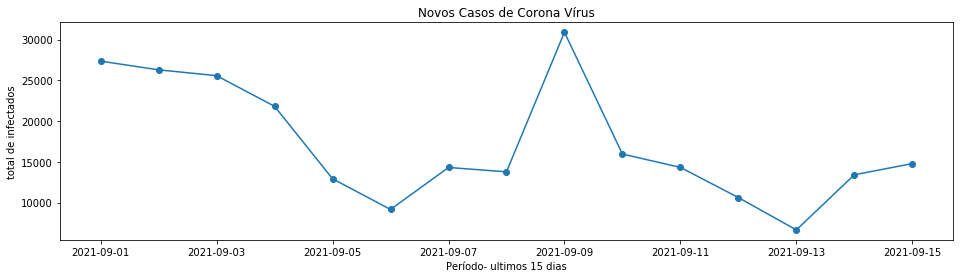

In [12]:
plt.figure(figsize=(16,4))
plt.plot(df.set_index('Date')['Novos Infectados'].iloc[-15:], lw=1.5, marker='o') #plt.plot(x,y)
plt.xlabel('Período- ultimos 15 dias')
plt.ylabel('total de infectados')
plt.title('Novos Casos de Corona Vírus')

In [13]:
#Gráfico das novas mortes nos ultimos 15 dias
#agora com o recurso do cufflink
import cufflinks as cf
cf.go_offline()

In [17]:
#esse gráfico está conectado, não funciona offline. Tem o recurso do tooltip ao passar o mouse sobre os pontos
fig = df.set_index('Date')['Novas Mortes'].iloc[-15:].iplot(mode='lines+markers',name='Teste')


In [14]:
#Record de novos infectados e mortes
Index_max_infec = df['Novos Infectados'].argmax() #retorna o índice do dia com mais infectados
Index_max_mortes = df['Novas Mortes'].argmax() #retorna o índice do dia com mais mortes

In [15]:
#Record de novos casos
df.iloc[Index_max_infec][['Date','Novos Infectados']]

Date                2021-06-23 00:00:00+00:00
Novos Infectados                       115228
Name: 518, dtype: object

In [16]:
#Record de mortes em um dia
df.iloc[Index_max_mortes][['Date','Novas Mortes']]

Date            2021-04-08 00:00:00+00:00
Novas Mortes                         4249
Name: 442, dtype: object

In [17]:
#top 5 mais mortes
df.sort_values(by='Novas Mortes', ascending=False).head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
442,82a37eef-8bb8-4887-9a17-5e6aa5043bae,Brazil,BR,,,,-14.24,-51.93,13279857,345025,11668734,1266098,2021-04-08 00:00:00+00:00,4249.0,86652.0
440,0f5ff7ec-7806-4e18-b81f-44c4b6c2682a,Brazil,BR,,,,-14.24,-51.93,13100580,336947,11459548,1304085,2021-04-06 00:00:00+00:00,4195.0,86979.0
434,72f80bd4-ec19-4812-8277-ba959bf69b68,Brazil,BR,,,,-14.24,-51.93,12748747,321515,11181371,1245861,2021-03-31 00:00:00+00:00,3869.0,90638.0
441,c0d9b884-a6fd-4f0b-91e2-9e03b017765a,Brazil,BR,,,,-14.24,-51.93,13193205,340776,11592159,1260270,2021-04-07 00:00:00+00:00,3829.0,92625.0
447,b55b82d0-0f36-4859-aa2c-83a55593605d,Brazil,BR,,,,-14.24,-51.93,13599994,358425,11975121,1266448,2021-04-13 00:00:00+00:00,3808.0,82186.0


In [18]:
#top 5 novos infectados
df.sort_values(by='Novos Infectados', ascending=False).head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
518,b4d7f8e6-8b08-444a-8558-e359029a2c14,Brazil,BR,,,,-14.24,-51.93,18169881,507109,16008271,1654501,2021-06-23 00:00:00+00:00,2392.0,115228.0
548,fe90adf3-4add-4788-89a3-ee28e9da9924,Brazil,BR,,,,-14.24,-51.93,19632443,548340,17475091,1609012,2021-07-23 00:00:00+00:00,1324.0,108732.0
428,7dcd57e4-1c68-44c4-82df-b8ce7660e8fb,Brazil,BR,,,,-14.24,-51.93,12320169,303462,10808499,1208208,2021-03-25 00:00:00+00:00,2777.0,100158.0
513,bb63a225-db1b-41f6-81f1-e725b3696711,Brazil,BR,,,,-14.24,-51.93,17801462,498499,15687189,1615774,2021-06-18 00:00:00+00:00,2495.0,98832.0
497,31ea5029-cf38-4003-893b-2927ac30c586,Brazil,BR,,,,-14.24,-51.93,16720081,467706,14763694,1488681,2021-06-02 00:00:00+00:00,2507.0,95601.0


In [19]:
df.tail()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
598,d179185b-3651-4321-9d82-79e488c6ac52,Brazil,BR,,,,-14.24,-51.93,20989164,586558,0,20402606,2021-09-11 00:00:00+00:00,712.0,14314.0
599,c0784d87-eec0-46d4-a5f9-b237894b9e09,Brazil,BR,,,,-14.24,-51.93,20999779,586851,0,20412928,2021-09-12 00:00:00+00:00,293.0,10615.0
600,5b706894-4abb-47a5-a915-add394cb7fc1,Brazil,BR,,,,-14.24,-51.93,21006424,587066,0,20419358,2021-09-13 00:00:00+00:00,215.0,6645.0
601,6f622f69-a8d4-42bf-b124-5c7adb1271a4,Brazil,BR,,,,-14.24,-51.93,21019830,587797,0,20432033,2021-09-14 00:00:00+00:00,731.0,13406.0
602,38cefdc2-80cb-40d3-89f6-0fda30e918e8,Brazil,BR,,,,-14.24,-51.93,21034610,588597,0,20446013,2021-09-15 00:00:00+00:00,800.0,14780.0


In [20]:
#média de novos infectados nos ultimos 15 dias..média movel
df['Novos Infectados'].rolling(window=15).mean().iloc[-15:]

588    25868.800000
589    24839.866667
590    24123.200000
591    23317.666667
592    22286.133333
593    21936.133333
594    22016.200000
595    20876.133333
596    20890.800000
597    19885.933333
598    19017.200000
599    18078.266667
600    17640.600000
601    17836.600000
602    17182.666667
Name: Novos Infectados, dtype: float64

In [21]:
#média de novas mortes nos ultimos 15 dias
df['Novas Mortes'].rolling(window=15).mean().iloc[-15:]

588    703.466667
589    683.466667
590    668.600000
591    656.733333
592    627.933333
593    618.866667
594    617.333333
595    578.600000
596    568.600000
597    552.066667
598    548.800000
599    522.733333
600    517.200000
601    548.200000
602    545.600000
Name: Novas Mortes, dtype: float64

In [22]:
#media móvel de mortes
df['Novas Mortes'].rolling(window=15).mean().iloc[-15:].mean()

597.2133333333334

In [23]:
#media móvel de novos infectados
df['Novos Infectados'].rolling(window=15).mean().iloc[-15:].mean()

21053.08

In [ ]:
#Fernando Humberto de Almeida Nascimento
#16/09/2021